# Project Phase: Visualization
In this stage, the dataset will be visualized in order to identify potential problems during modelling. At this stage, histograms, ECDFs, heatmaps, and more will be used to detect potential problems.

## Importing Python Packages
No let's import the tools we will be using in this phase. As usual, we will import `Pandas` for *data frame manipulation*, `Numpy` for *vectorized array operations*, `Seaborn` for statistical data visualization, and `Matplotplib` for low-level tweaking of charts.

In [1]:
# Task: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Task: Set Color Pallete
PALLETE = sns.color_palette("Accent")
sns.set_palette(PALLETE)

## Importing Cleaned Data
We will now proceed where we left of from the last phase. To start with, we will use the cleaned data processed during our [data cleaning phase](./01%20-%20Data%20Cleaning.ipynb).

In [3]:
# Task: Import Cleaned Data

# Import the Feature Names, convert them to numpy and them flatten them into one-dimension.
ATTRS_NUM = pd.read_csv("dataset/constants/ATTRS_NUM.csv", index_col=0).to_numpy().flatten()
ATTRS_ORD = pd.read_csv("dataset/constants/ATTRS_ORD.csv", index_col=0).to_numpy().flatten()
ATTRS_NOM = pd.read_csv("dataset/constants/ATTRS_NOM.csv", index_col=0).to_numpy().flatten()
ATTRS_ALL_REARRANGED = pd.read_csv("dataset/constants/ATTRS_ALL_REARRANGED.csv", index_col=0).to_numpy().flatten()
ATTR_TAR = pd.read_csv("dataset/constants/ATTR_TAR.csv", index_col=0).to_numpy().flatten()

# Import the Features and Targets
DATASET = pd.read_csv("dataset/cleaned/Dataset.csv", index_col="EmployeeNumber")

## Visualizing the Dataset
Once our data was imported, we will visuallize them. The code below will run a nested `for` loop to plot each attribute's histogram and ECDF.

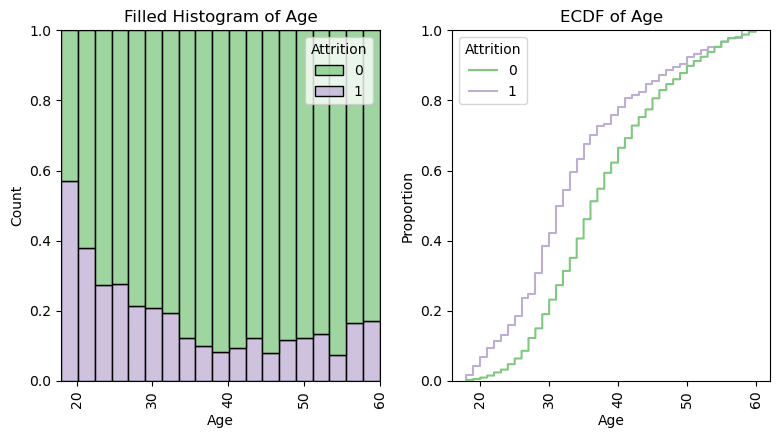

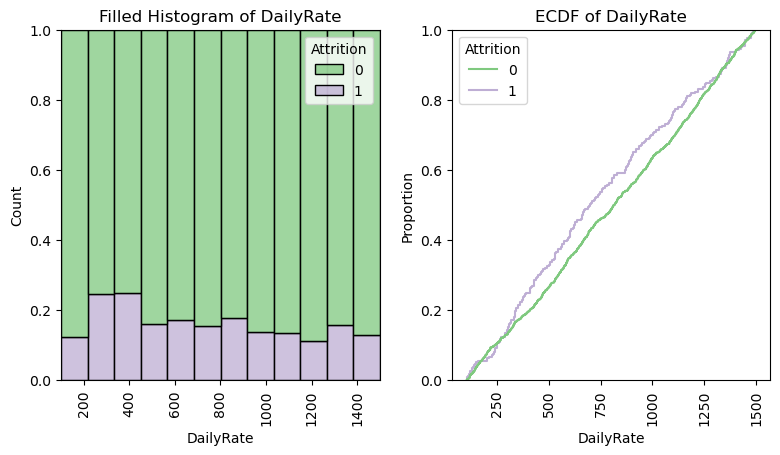

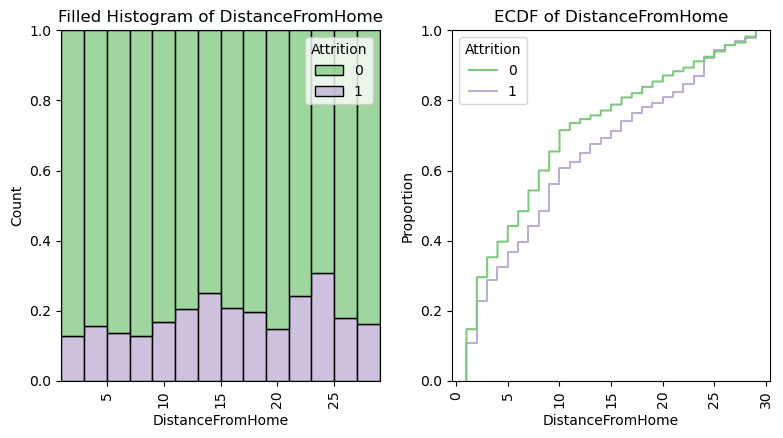

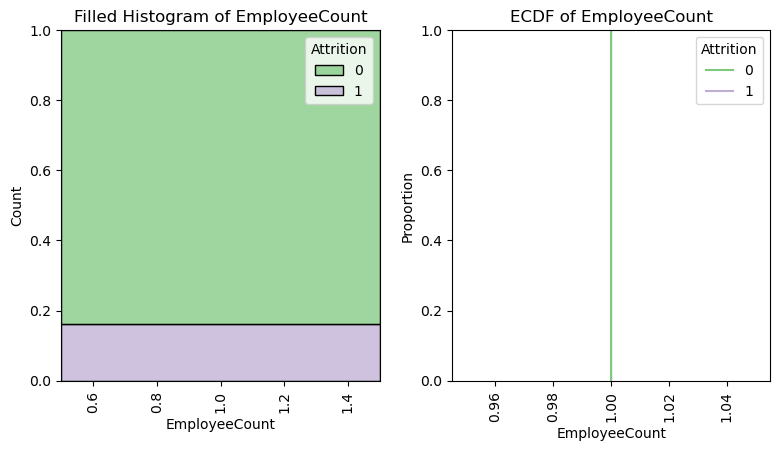

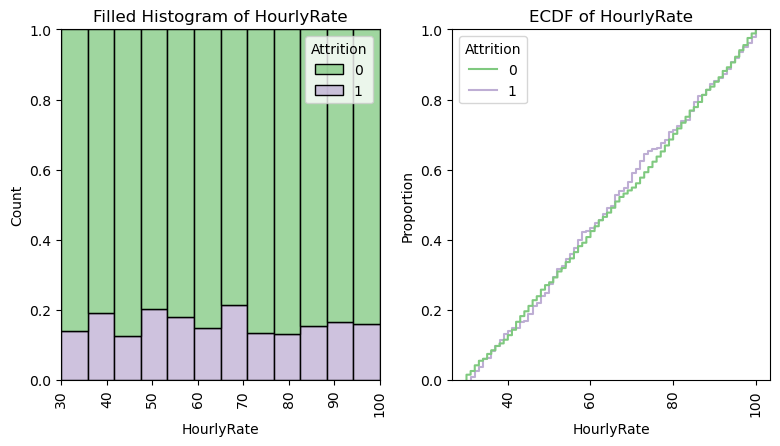

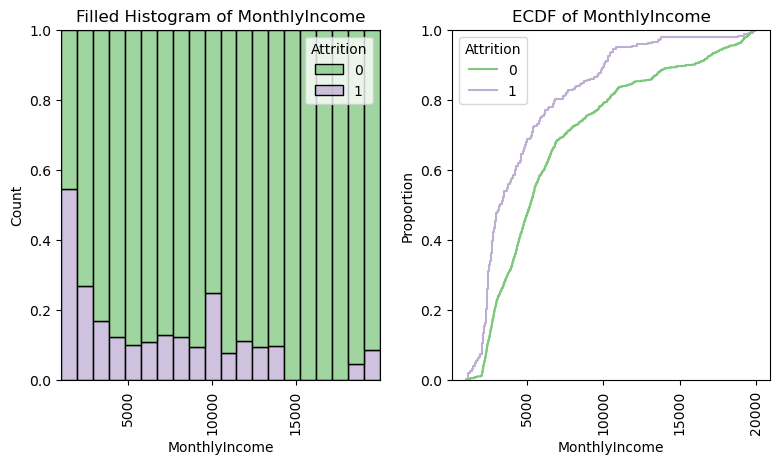

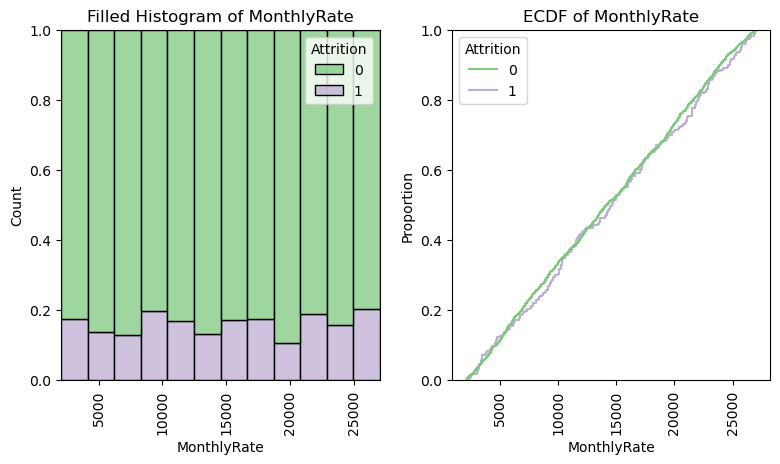

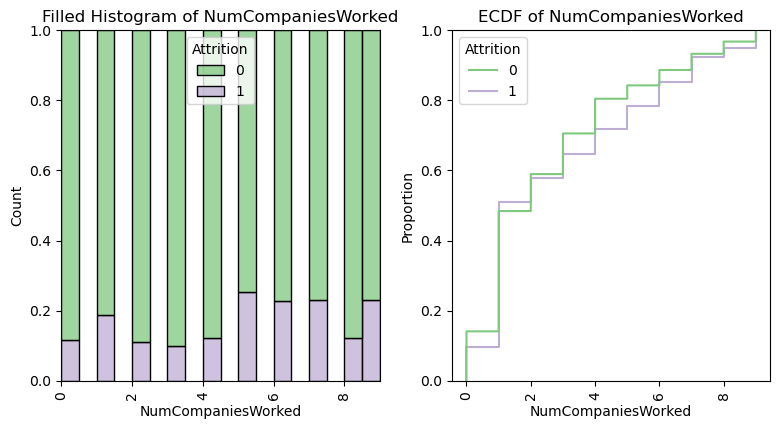

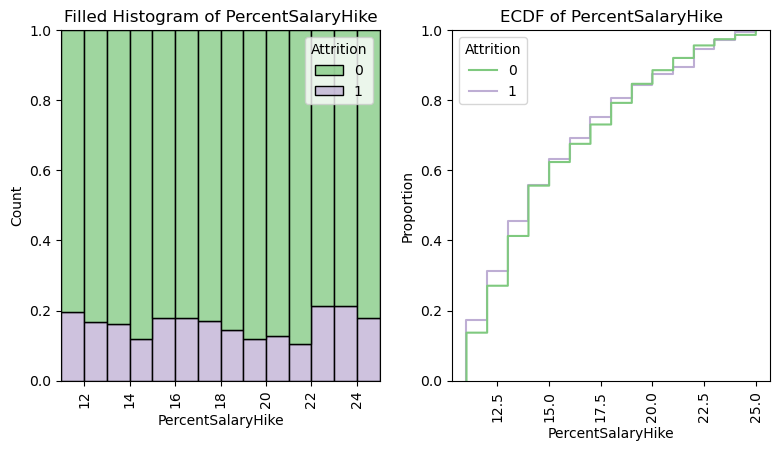

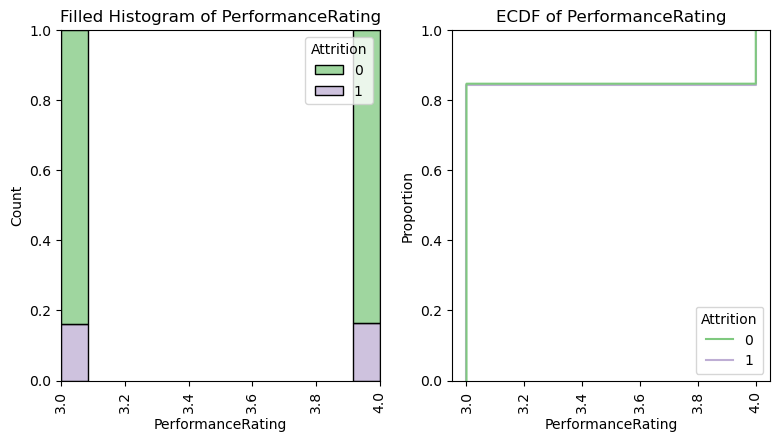

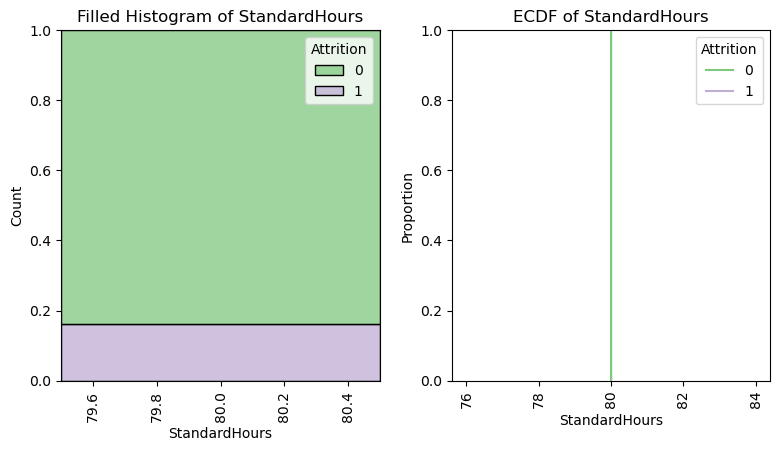

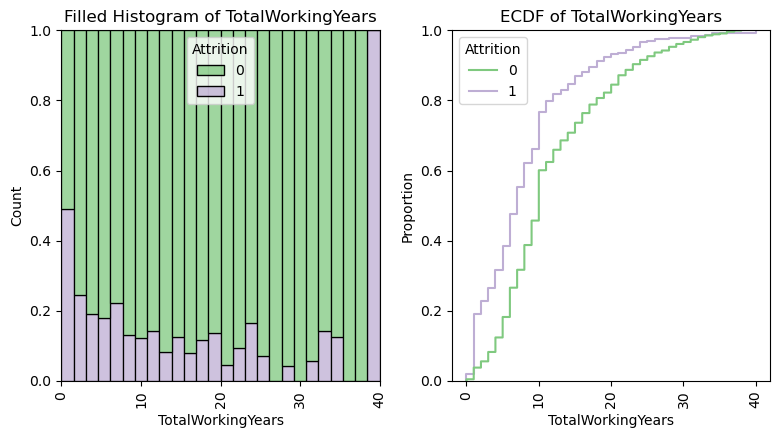

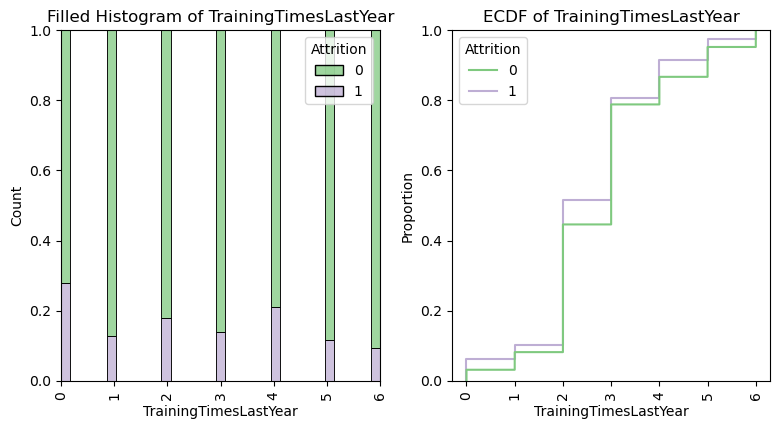

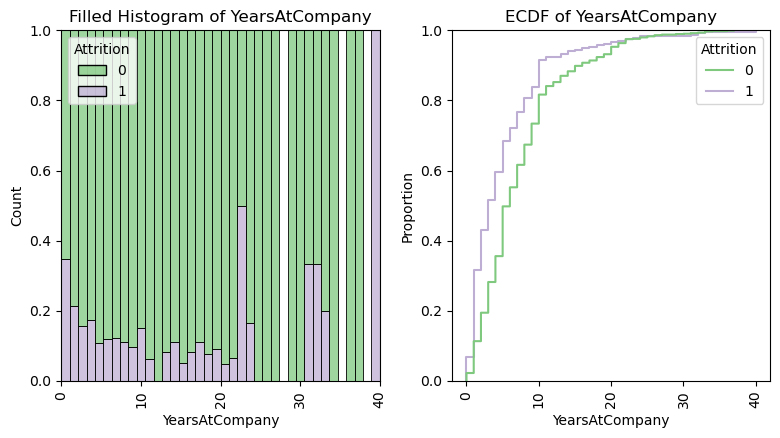

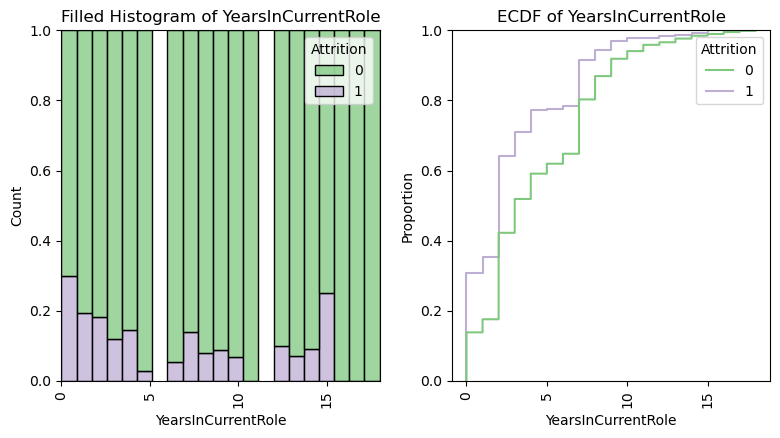

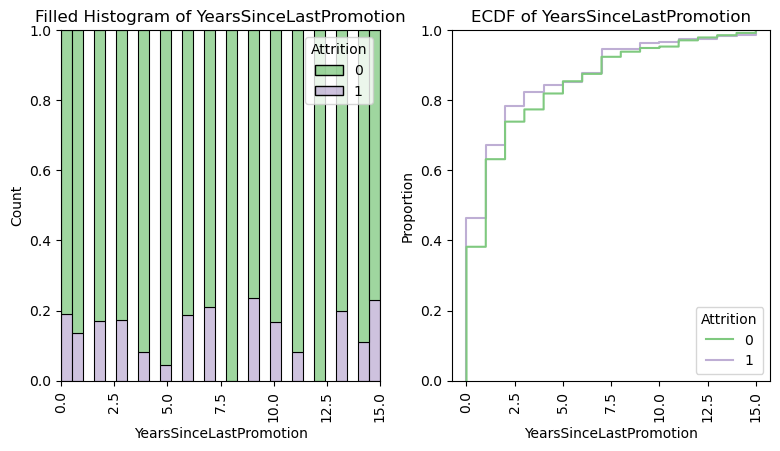

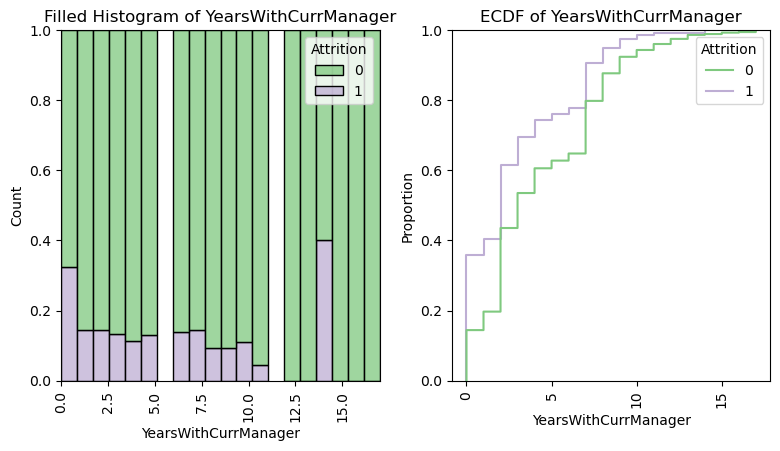

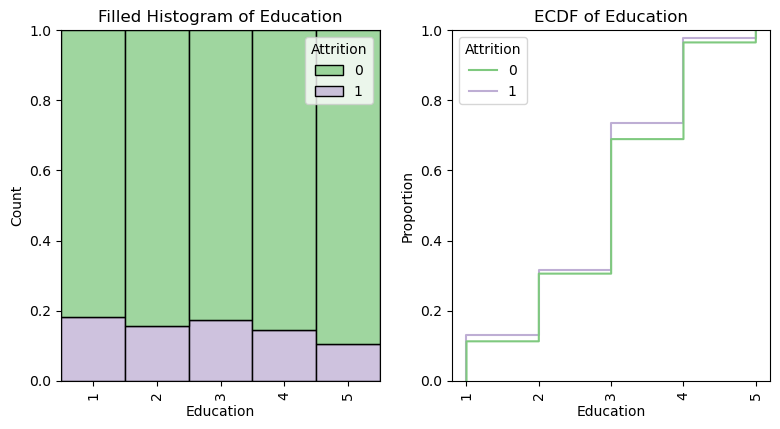

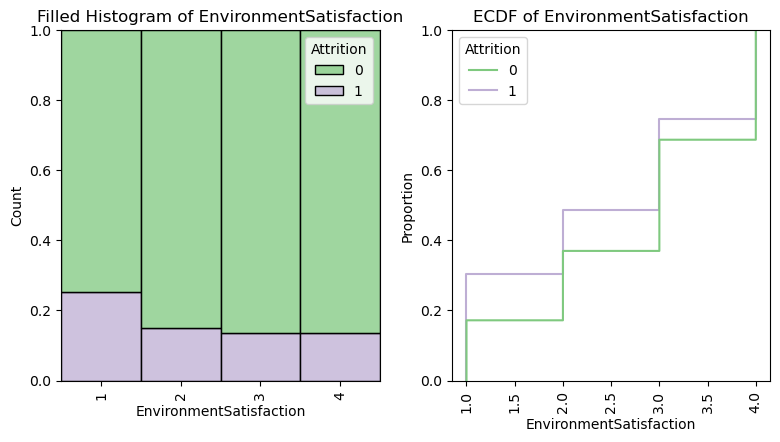

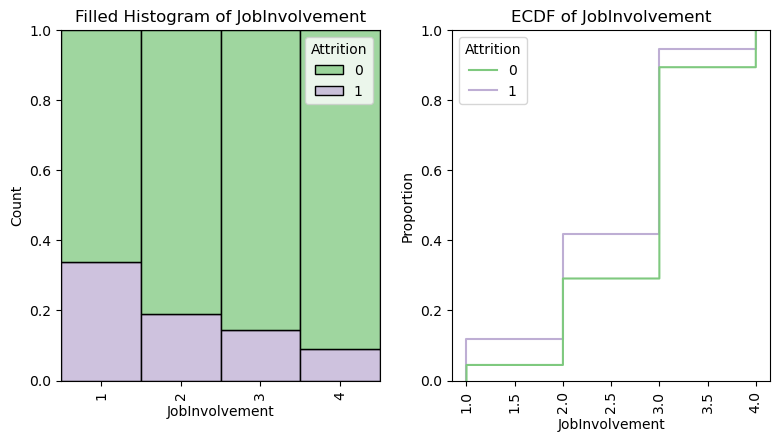

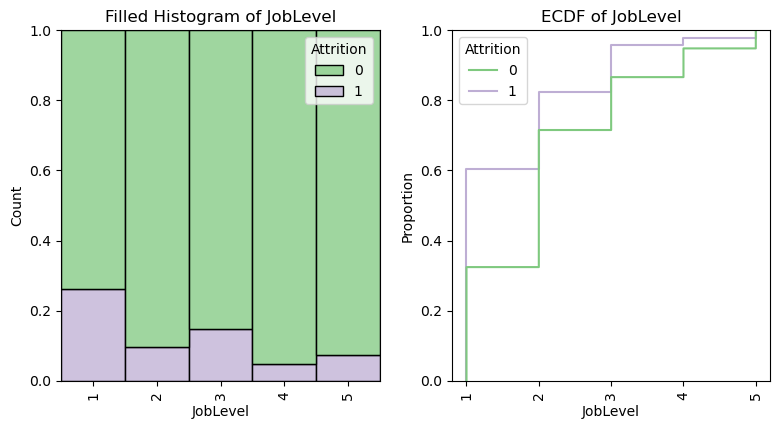

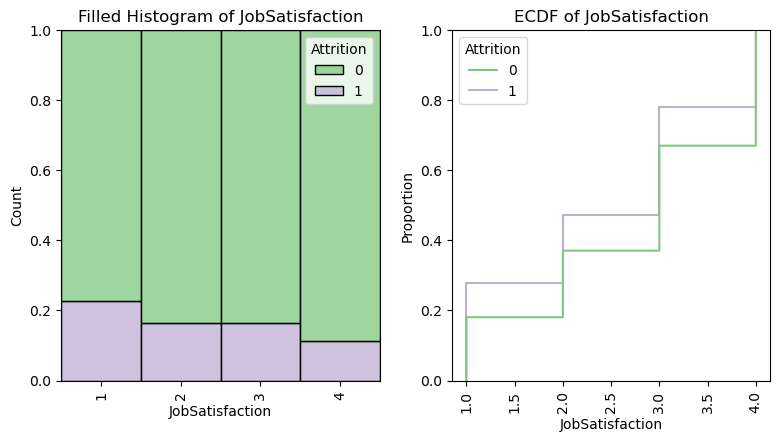

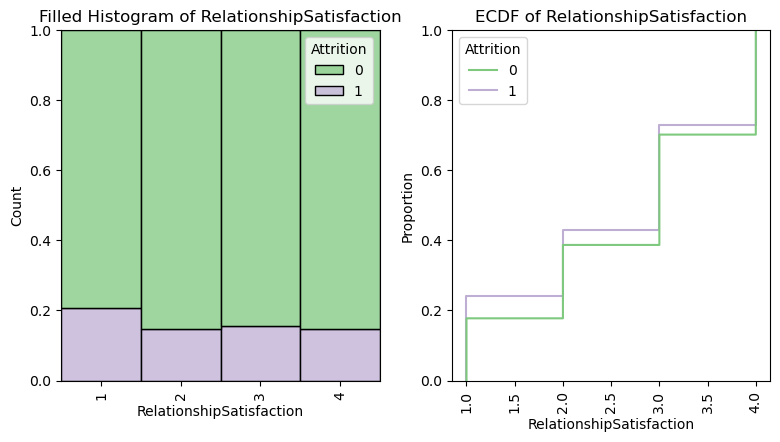

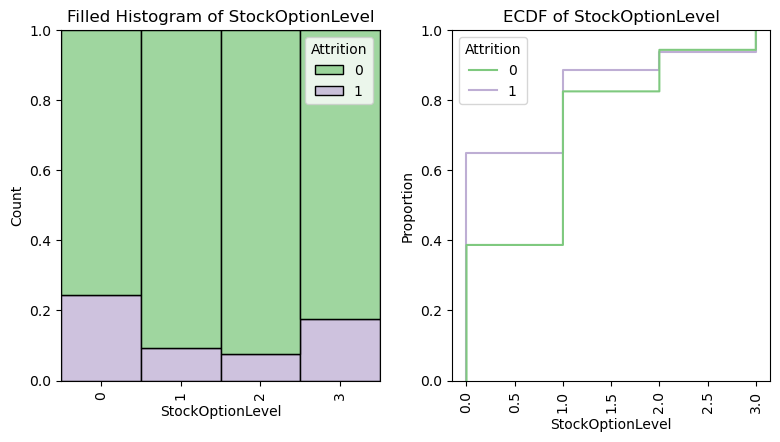

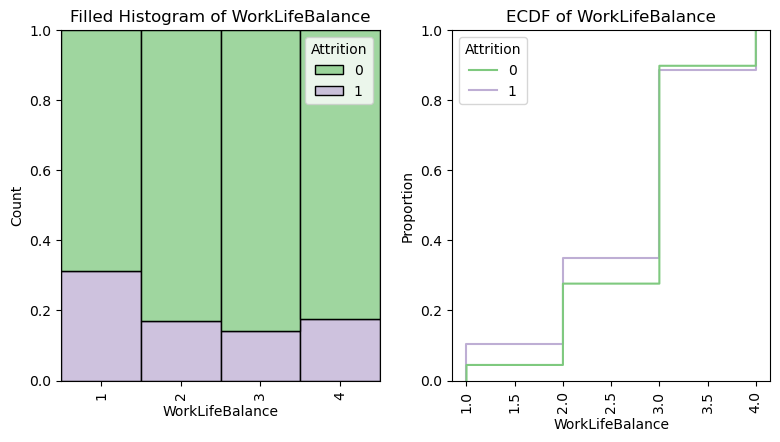

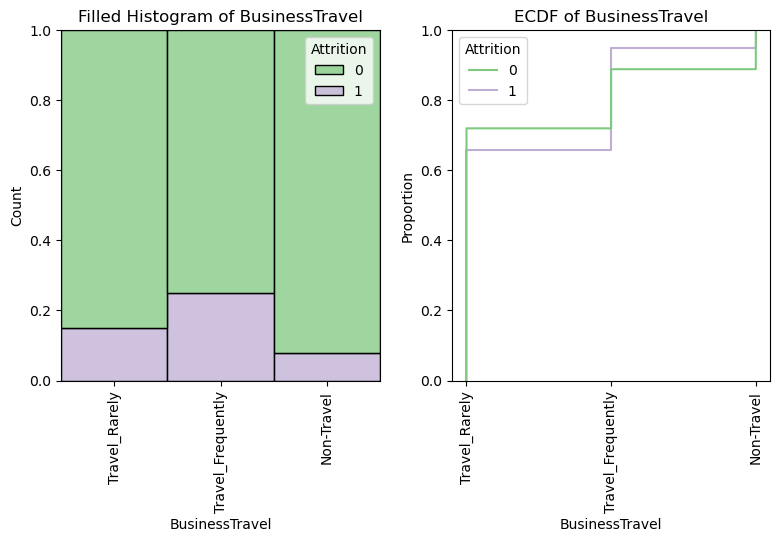

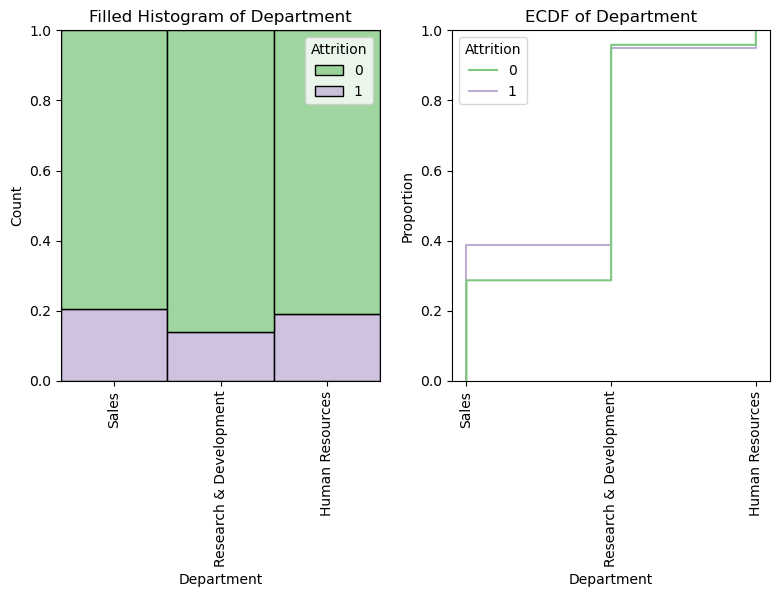

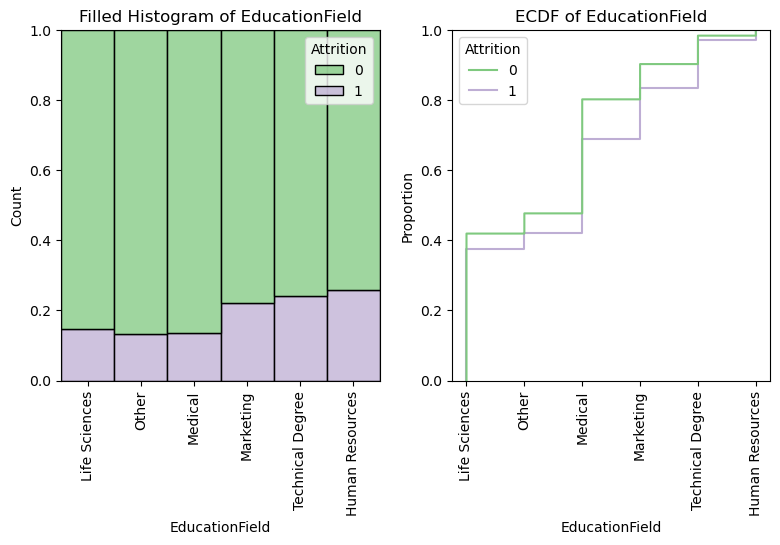

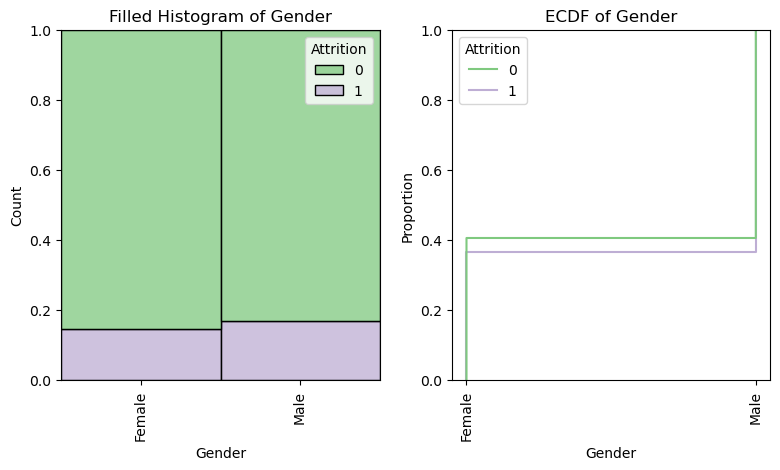

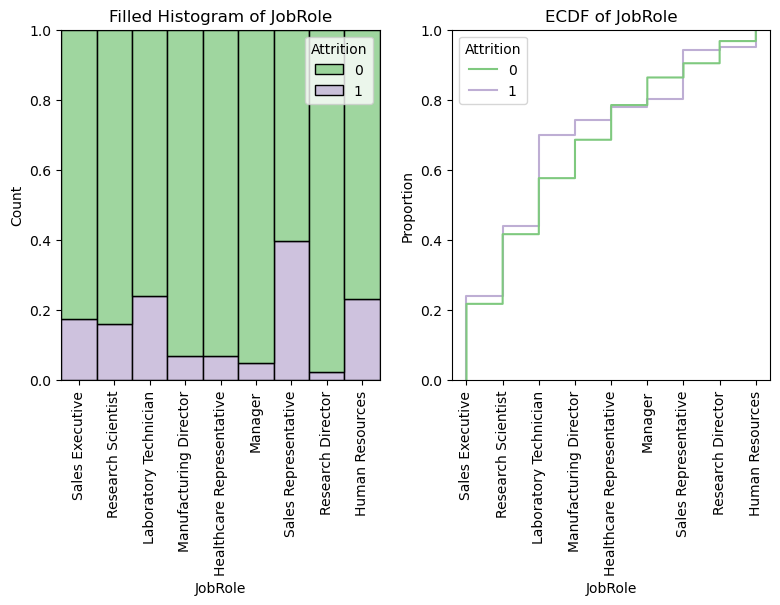

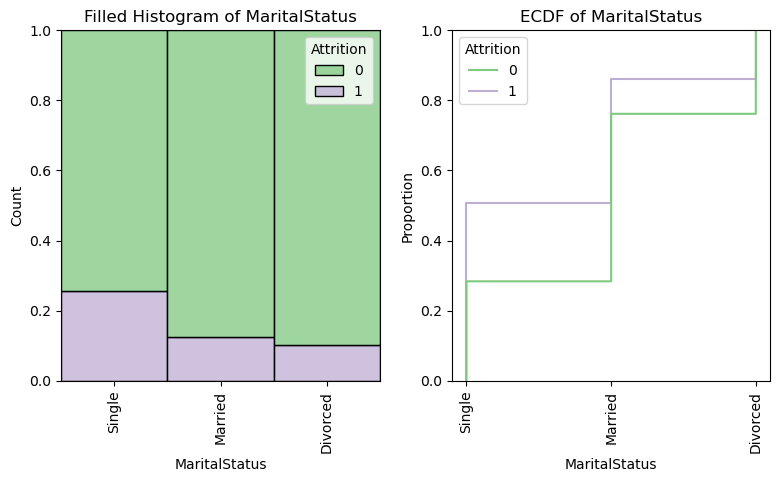

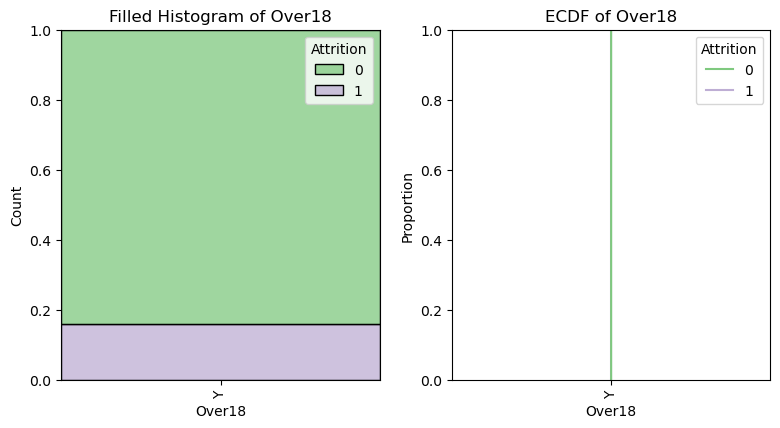

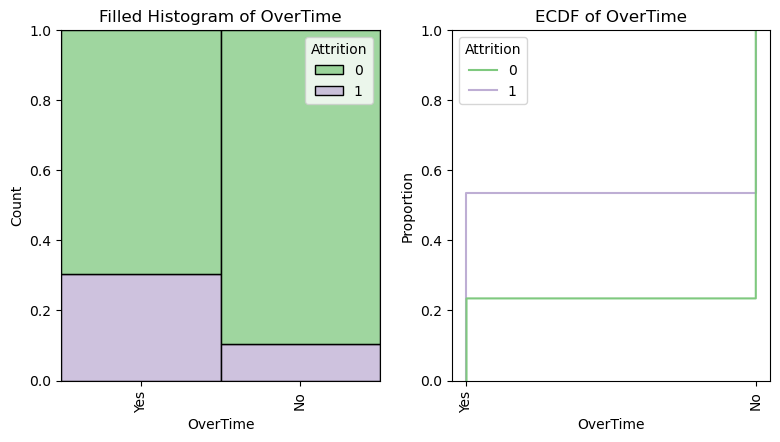

In [4]:
# Task: Show Histogram and ECDF to

for attr_set in [ATTRS_NUM, ATTRS_ORD, ATTRS_NOM]:
  for attr in attr_set:
    fig, axes = plt.subplots(1, 2)
    fig.tight_layout()
    fig.set_size_inches(w=8, h=4)
      
    if attr in ATTRS_ORD:
      sns.histplot(data=DATASET, x=attr, hue=ATTR_TAR[0], multiple="fill", ax=axes[0], discrete=True).set(title=f"Filled Histogram of {attr}")
    else:
      sns.histplot(data=DATASET, x=attr, hue=ATTR_TAR[0], multiple="fill", ax=axes[0]).set(title=f"Filled Histogram of {attr}")
    
    # Rotate all Xticks of all axes to 90-degrees
    for ax in axes:
      for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    sns.ecdfplot(data=DATASET, x=attr, hue=ATTR_TAR[0], ax=axes[1]).set(title=f"ECDF of {attr}")
    plt.show()

## Visualizing Correlation
Now, let's check how each variables correlates with each other. The code below will generate a heatmap containing the correlation coefficient (Kendall's Tau) among each of the numerical attributes.

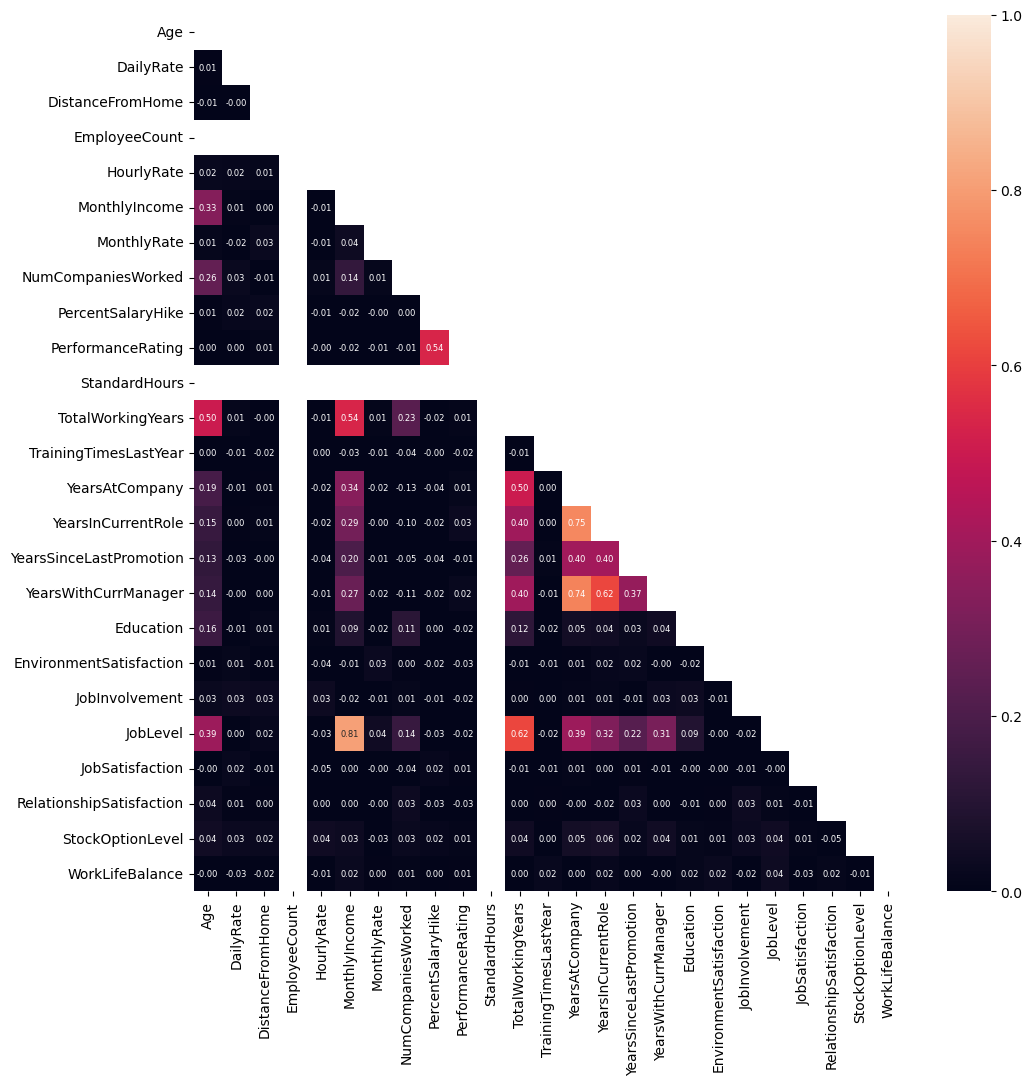

In [5]:
# Task: Plotting Correlation amongst numerical attributes.

ATTRS = [attr for attr_set in [ATTRS_NUM, ATTRS_ORD] for attr in attr_set]

fig, axes = plt.subplots(1,1)
fig.tight_layout()
fig.set_size_inches(10,10)

correlation_matrix = DATASET[ATTRS].corr(method="kendall")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=0, vmax=1, mask=mask, annot=True, fmt=".2f", annot_kws={'size': 6}, ax=axes)
plt.show()

## Closing
Now we are able to familiarize the distributions of each of the attributes. We can now visually compare the distributions of employees who stayed and left the company. We were also able to see the correlation of each of the numerical attributes with each other. We can do so much more in this phase, the only limitation will only be our curiousity. But since the goal of this project is understand how each of the attributes were related to employee attrition by applying different machine learning models, we will not dive deeper into other visualizations.